In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings

from matplotlib.pyplot import boxplot
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans

In [2]:
names = ["K Nearest Neighbors", "Gaussian NB", "Decision Tree", "Logistic Regression",
         "Gradient Boosting", "Random Forest", "MLP"]

classifiers = [
    KNeighborsClassifier(3),
    GaussianNB(),
    DecisionTreeClassifier(max_depth=5),
    LogisticRegression(random_state=0),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),]

In [3]:
#Read in data
steelplates_data = pd.read_csv("php9xWOpn.csv")
ionosphere_data = pd.read_csv("dataset_59_ionosphere.csv")
banknotes_data = pd.read_csv("php50jXam.csv")

X, y = make_classification(n_features=20, n_redundant=0, n_informative=5, n_clusters_per_class=1)
X += 4.0 * np.random.uniform(size=X.shape)
X = StandardScaler().fit_transform(X)

#framing fake dataset
X = pd.DataFrame(X)
y = pd.DataFrame(y)

#https://stackoverflow.com/questions/33088010/pandas-column-bind-cbind-two-data-frames
fake_data = pd.concat([X.reset_index(drop=True), y], axis=1)
#combine each dataframe into an array so that we can handle it all at once
data_frames = [steelplates_data, ionosphere_data, banknotes_data, fake_data]
#ignore warnings
warnings.filterwarnings("ignore")

In [4]:
#Plot boxplot
def box_plot(results, title_name):
    for i in range(len(results)):
        plt.subplots()
        plt.title(f'{title_name} - dataset {i + 1}')
        plt.boxplot(results[i])

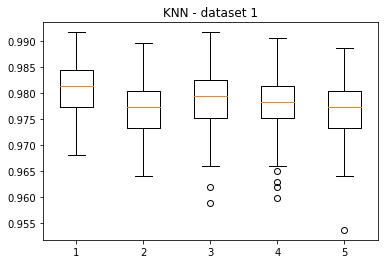

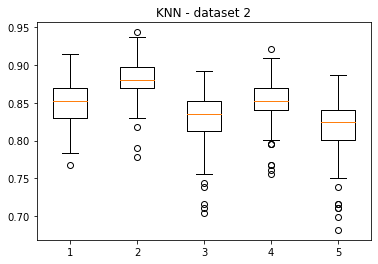

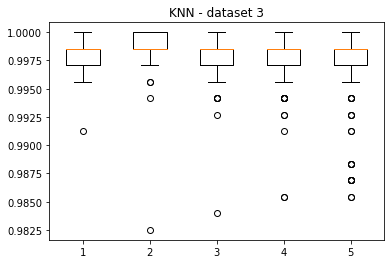

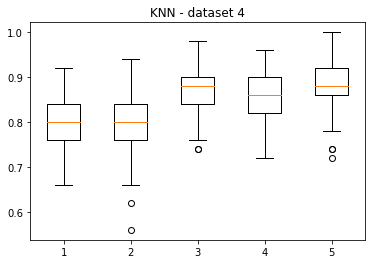

In [5]:
#KNN
#parameters from 1 to 5
params = [1, 2, 3, 4, 5]
knn_scores = []
knn_avg_scores = ['KNN']
knn_best_params = ['KNN']

for data in data_frames:
    data_scores = []
    avg_score = 0
    best_score = 0
    best_param = 0
    
    for param in params:
        #create KNN
        knn = KNeighborsClassifier(n_neighbors=param)
        param_scores = []
        current_score = 0
        score_sum = 0
        
        
        #loop through 250 times to get each score
        for i in range(250):
            X = data[data.columns[:-1]]
            y = data.iloc[:, -1]
            X = StandardScaler().fit_transform(X)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
            knn.fit(X_train, y_train)
            current_score = knn.score(X_test, y_test)
            param_scores.append(current_score)
            score_sum += current_score
    
        avg_score = score_sum / 250
        if best_score < avg_score:
                best_score = avg_score
                best_param = param
        
        data_scores.append(param_scores)
    knn_scores.append(data_scores)
    #save validation error for table later
    knn_avg_scores.append(1 - avg_score)
    knn_best_params.append(best_param)

box_plot(knn_scores, 'KNN')

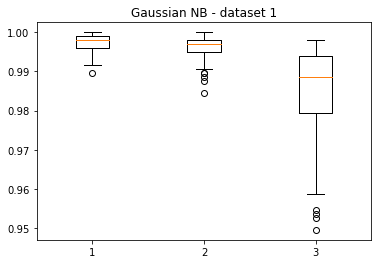

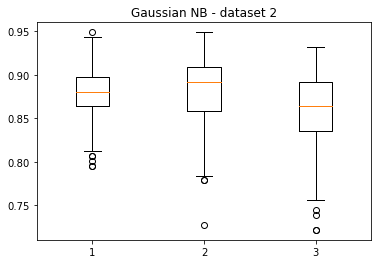

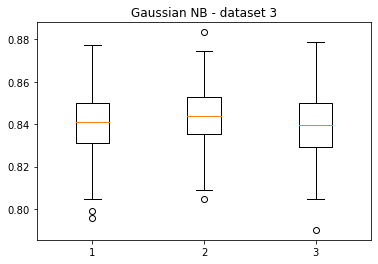

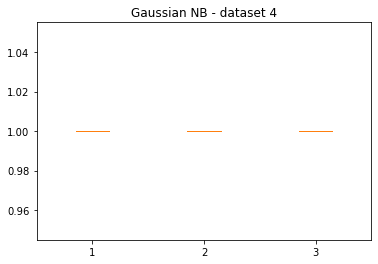

In [6]:
#Gaussian NB
#parameters [1e-9,1e-5,1e-1]
params = [1e-9,1e-5,1e-1]
gnb_scores = []
gnb_avg_scores = ['Gaussian NB']
gnb_best_params = ['Gaussian NB']

for data in data_frames:
    data_scores = []
    avg_score = 0
    best_score = 0
    best_param = 0
    
    for param in params:
        #create Gaussian NB
        gnb = GaussianNB(var_smoothing=param)
        param_scores = []
        current_score = 0
        score_sum = 0
        
        
        #loop through 250 times to get each score
        for i in range(250):
            X = data[data.columns[:-1]]
            y = data.iloc[:, -1]
            X = StandardScaler().fit_transform(X)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
            gnb.fit(X_train, y_train)
            current_score = gnb.score(X_test, y_test)
            param_scores.append(current_score)
            score_sum += current_score
    
        avg_score = score_sum / 250
        if best_score < avg_score:
                best_score = avg_score
                best_param = param
        
        data_scores.append(param_scores)
    gnb_scores.append(data_scores)
    #save validation error for table later
    gnb_avg_scores.append(1 - avg_score)
    gnb_best_params.append(best_param)

box_plot(gnb_scores, 'Gaussian NB')

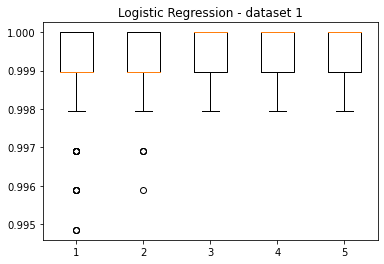

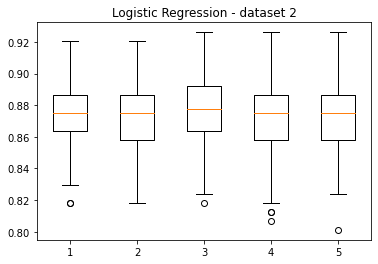

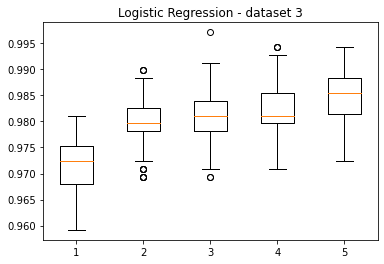

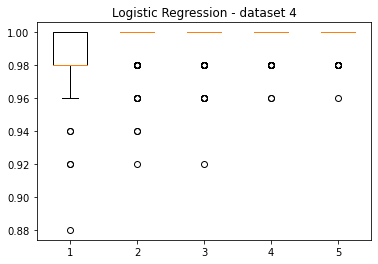

In [7]:
#Logistic Regression
#parameters [.1,.5,1.0,2.0, 5.0]
params = [.1,.5,1.0,2.0, 5.0]
lr_scores = []
lr_avg_scores = ['Logistic Regression']
lr_best_params = ['Logistic Regression']

for data in data_frames:
    data_scores = []
    avg_score = 0
    best_score = 0
    best_param = 0
    
    for param in params:
        #create Logistic Regression
        lr = LogisticRegression(C=param)
        param_scores = []
        current_score = 0
        score_sum = 0
        
        
        #loop through 250 times to get each score
        for i in range(250):
            X = data[data.columns[:-1]]
            y = data.iloc[:, -1]
            X = StandardScaler().fit_transform(X)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
            lr.fit(X_train, y_train)
            current_score = lr.score(X_test, y_test)
            param_scores.append(current_score)
            score_sum += current_score
    
        avg_score = score_sum / 250
        if best_score < avg_score:
                best_score = avg_score
                best_param = param
        
        data_scores.append(param_scores)
    lr_scores.append(data_scores)
    #save validation error for table later
    lr_avg_scores.append(1 - avg_score)
    lr_best_params.append(best_param)

box_plot(lr_scores, 'Logistic Regression')

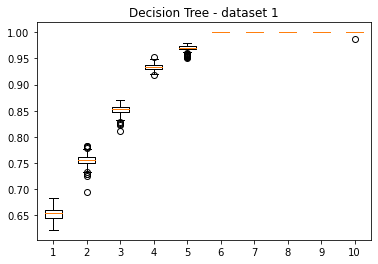

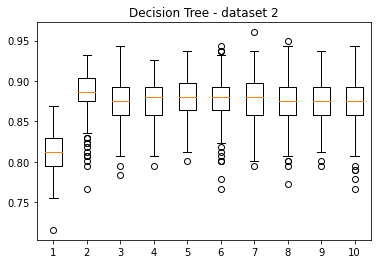

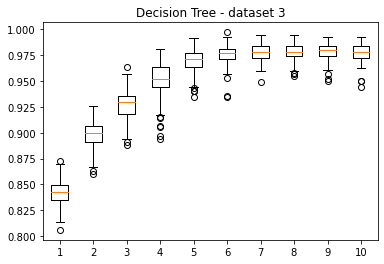

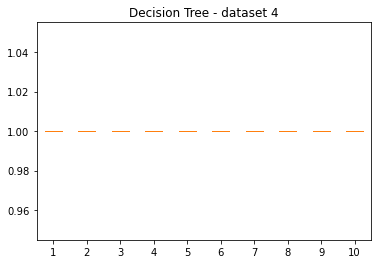

In [8]:
#Decision Tree
#parameters 1 to 10
params = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
dt_scores = []
dt_avg_scores = ['Decision Tree']
dt_best_params = ['Decision Tree']

for data in data_frames:
    data_scores = []
    avg_score = 0
    best_score = 0
    best_param = 0
    
    for param in params:
        #create Decision Tree
        dt = DecisionTreeClassifier(max_depth=param)
        param_scores = []
        current_score = 0
        score_sum = 0
        
        
        #loop through 250 times to get each score
        for i in range(250):
            X = data[data.columns[:-1]]
            y = data.iloc[:, -1]
            X = StandardScaler().fit_transform(X)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
            dt.fit(X_train, y_train)
            current_score = dt.score(X_test, y_test)
            param_scores.append(current_score)
            score_sum += current_score
    
        avg_score = score_sum / 250
        if best_score < avg_score:
                best_score = avg_score
                best_param = param
        
        data_scores.append(param_scores)
    dt_scores.append(data_scores)
    #save validation error for table later
    dt_avg_scores.append(1 - avg_score)
    dt_best_params.append(best_param)

box_plot(dt_scores, 'Decision Tree')

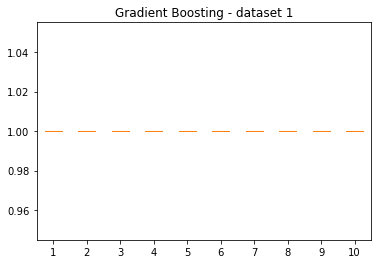

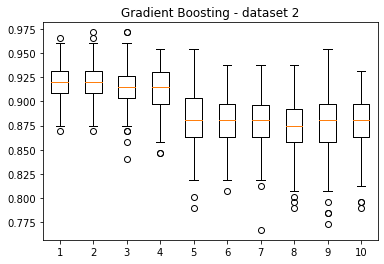

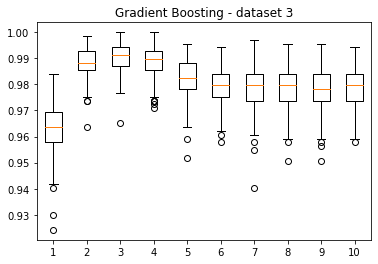

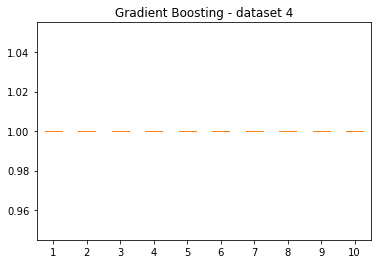

In [9]:
#Gradient Boosting
#parameters 1 to 10
params = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
gb_scores = []
gb_avg_scores = ['Gradient Boosting']
gb_best_params = ['Gradient Boosting']

for data in data_frames:
    data_scores = []
    avg_score = 0
    best_score = 0
    best_param = 0
    
    for param in params:
        #create Gradient Boosting
        gb = GradientBoostingClassifier(max_depth=param)
        param_scores = []
        current_score = 0
        score_sum = 0
        
        
        #loop through 250 times to get each score
        for i in range(250):
            X = data[data.columns[:-1]]
            y = data.iloc[:, -1]
            X = StandardScaler().fit_transform(X)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
            gb.fit(X_train, y_train)
            current_score = gb.score(X_test, y_test)
            param_scores.append(current_score)
            score_sum += current_score
    
        avg_score = score_sum / 250
        if best_score < avg_score:
                best_score = avg_score
                best_param = param
        
        data_scores.append(param_scores)
    gb_scores.append(data_scores)
    #save validation error for table later
    gb_avg_scores.append(1 - avg_score)
    gb_best_params.append(best_param)

box_plot(gb_scores, 'Gradient Boosting')

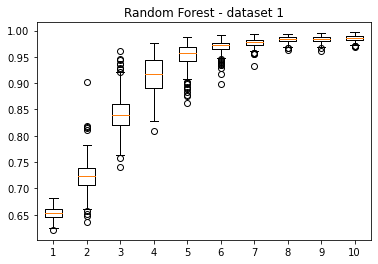

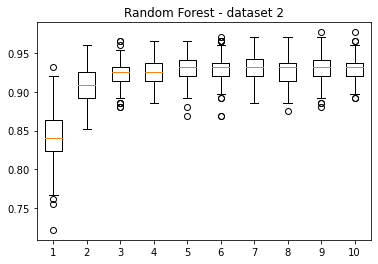

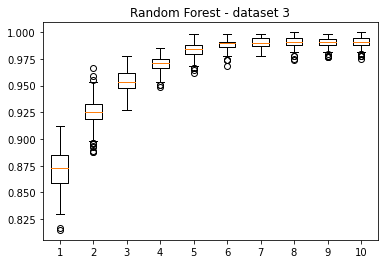

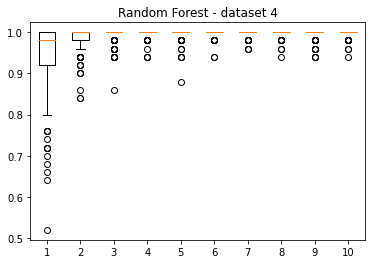

In [10]:
#Random Forest
#parameters 1 to 10
params = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
rf_scores = []
rf_avg_scores = ['Random Forest']
rf_best_params = ['Random Forest']

for data in data_frames:
    data_scores = []
    avg_score = 0
    best_score = 0
    best_param = 0
    
    for param in params:
        #create Random Forest
        rf = RandomForestClassifier(max_depth=param)
        param_scores = []
        current_score = 0
        score_sum = 0
        
        
        #loop through 250 times to get each score
        for i in range(250):
            X = data[data.columns[:-1]]
            y = data.iloc[:, -1]
            X = StandardScaler().fit_transform(X)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
            rf.fit(X_train, y_train)
            current_score = rf.score(X_test, y_test)
            param_scores.append(current_score)
            score_sum += current_score
    
        avg_score = score_sum / 250
        if best_score < avg_score:
                best_score = avg_score
                best_param = param
        
        data_scores.append(param_scores)
    rf_scores.append(data_scores)
    #save validation error for table later
    rf_avg_scores.append(1 - avg_score)
    rf_best_params.append(best_param)

box_plot(rf_scores, 'Random Forest')

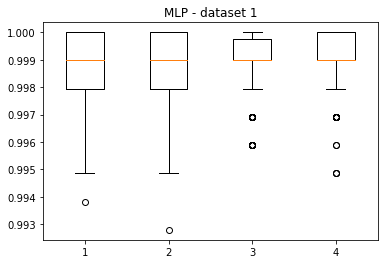

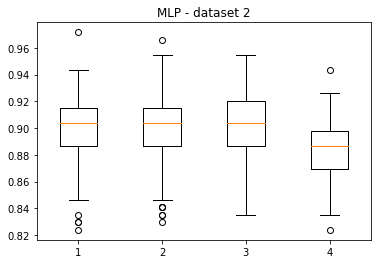

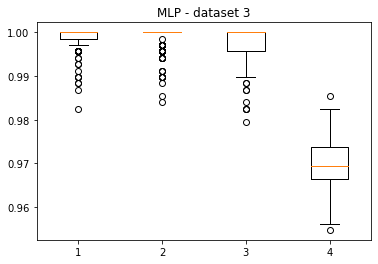

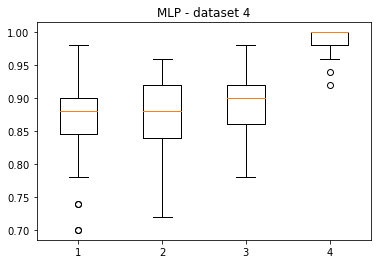

In [11]:
#MLP
#parameters
params = [1e-5, 1e-3, 0.1, 10.0]
mlp_scores = []
mlp_avg_scores = ['MLP']
mlp_best_params = ['MLP']

for data in data_frames:
    data_scores = []
    avg_score = 0
    best_score = 0
    best_param = 0
    
    for param in params:
        #create MLP
        mlp = MLPClassifier(alpha=param)
        param_scores = []
        current_score = 0
        score_sum = 0
        
        
        #loop through 250 times to get each score
        for i in range(250):
            X = data[data.columns[:-1]]
            y = data.iloc[:, -1]
            X = StandardScaler().fit_transform(X)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
            mlp.fit(X_train, y_train)
            current_score = mlp.score(X_test, y_test)
            param_scores.append(current_score)
            score_sum += current_score
    
        avg_score = score_sum / 250
        if best_score < avg_score:
                best_score = avg_score
                best_param = param
        
        data_scores.append(param_scores)
    mlp_scores.append(data_scores)
    #save validation error for table later
    mlp_avg_scores.append(1 - avg_score)
    mlp_best_params.append(best_param)

box_plot(mlp_scores, 'MLP')

In [13]:
#add all results to an array to display in table at once
#best test accuracies
best_scores = [['Table 1', 'Bank Notes', 'Ionosphere', 'Steel Plates', 'Fake Data'], knn_avg_scores, gnb_avg_scores, lr_avg_scores, dt_avg_scores, gb_avg_scores, rf_avg_scores, mlp_avg_scores]
best_params = [['Table 2', 'Bank Notes', 'Ionosphere', 'Steel Plates', 'Fake Data'], knn_best_params, gnb_best_params, lr_best_params, dt_best_params, gb_best_params, rf_best_params, mlp_best_params]

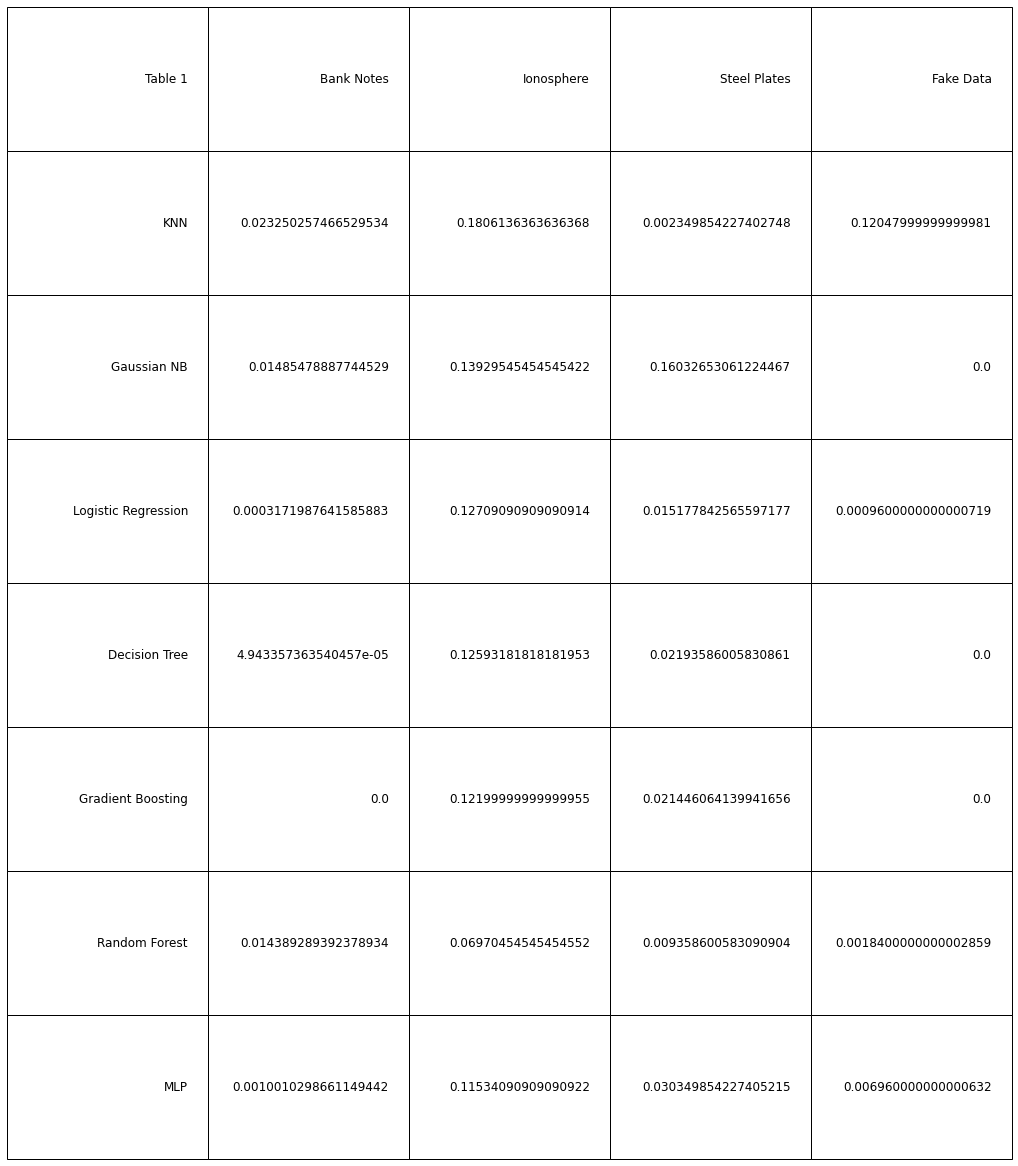

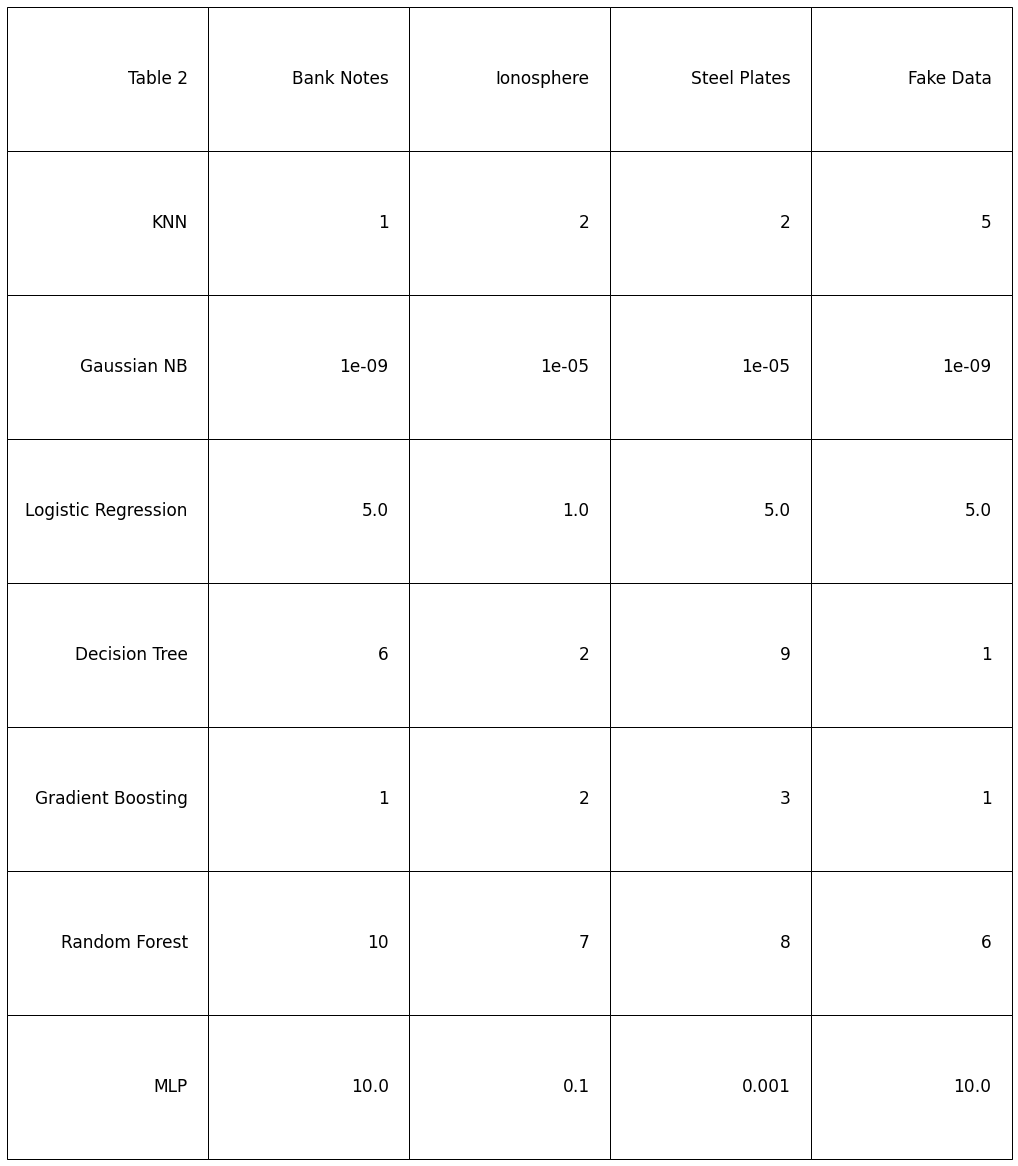

In [14]:
#Table1
#https://www.statology.org/matplotlib-table/
#define figure and axes
fig, ax = plt.subplots()

#create table
table = ax.table(cellText=best_scores, loc='center')

#modify table
table.set_fontsize(20)
table.scale(3, 12)
ax.axis('off')

#display table
plt.show()

#Table2
#define figure and axes
fig, ax = plt.subplots()

#create table
table = ax.table(cellText=best_params, loc='center')

#modify table
table.set_fontsize(20)
table.scale(3, 12)
ax.axis('off')

#display table
plt.show()

#Summary

As a result of running 7 different classifiers on 4 different datasets, I have gotten a few 100% accuracy for the fake data and test, which means that the validation error is 0. This should not be the case when the fake data is generated randomly(or in theory), the classifiers should not be able to find a pattern within the dataset. I believe that the fake data is either not random at all or the fake data dataframe is not well fit into the classifiers. apart from that, the tables show an expected result apart from the fake datas and it also gives us an insight on the different parameter used for the classifiers. For example, the KNN classifier has two 2's which did the best in accuracy and a 1 and 5, that tells us the trainingset wasn't overfitted which is good. Overall, most of the outcome I have retrieved are fairly normal except the fake dataset validation error and I think that the tables are very visuable and contains a lot of information that can be insightful.

In [18]:
#Read in data
iris_data = pd.read_csv("dataset_61_iris.csv")
banknote_data = pd.read_csv("php50jXam.csv")
#Fit dataset, select all 4 features
#x = iris_data.iloc[:, [0,1,2,3]].values

def cluster(data):
    X = data[data.columns[:-1]]
    
    kmeans = KMeans(n_clusters=3).fit(X)
    labels = pd.DataFrame(kmeans.labels_)
    clustered = pd.concat([data.reset_index(), labels], axis=1)
    
    return X, clustered

#training and testing unclustered-dataframe
def train_test_unclustered(unclustered):
    scores = []
    
    for i in range(100):
        gaussiannb = GaussianNB()
        
        X = unclustered[unclustered.columns[:-1]]
        y = unclustered.iloc[:, -1]
        X = StandardScaler().fit_transform(X)
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=i)
        gaussiannb.fit(X_train, y_train)
        scores.append(gaussiannb.score(X_test, y_test))
    
    return scores

#training and testing clustered-dataframe
def train_test_clustered(clustered):
    scores = []
    
    for i in range(100):
        gaussiannb = GaussianNB()
        
        X = clustered.loc[:, clustered.columns != 'class']
        y = clustered.iloc[:, -2]
        X = StandardScaler().fit_transform(X)
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=i)
        gaussiannb.fit(X_train, y_train)
        scores.append(gaussiannb.score(X_test, y_test))
        
    return scores

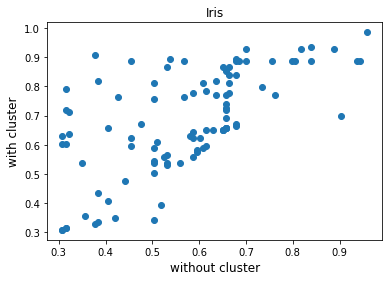

In [19]:
#Iris
unclustered, clustered = cluster(iris_data)
unclustered_scores = train_test_unclustered(iris_data)
clustered_scores = train_test_clustered(clustered)
       
plt.scatter(x=unclustered_scores, y=clustered_scores)
plt.xlabel('without cluster', fontsize=12)
plt.ylabel('with cluster', fontsize=12)
plt.title(f'Iris')
plt.show()

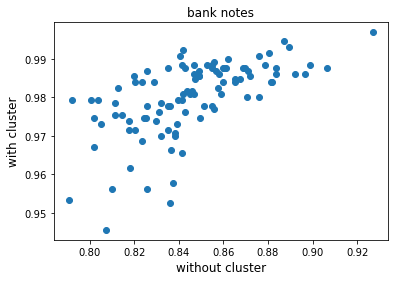

In [20]:
#banknotes
unclustered, clustered = cluster(banknote_data)
unclustered_scores = train_test_unclustered(banknote_data)
clustered_scores = train_test_clustered(clustered)
       
plt.scatter(x=unclustered_scores, y=clustered_scores)
plt.xlabel('without cluster', fontsize=12)
plt.ylabel('with cluster', fontsize=12)
plt.title(f'bank notes')
plt.show()

#Summary

As a result of clustering two different datasets using the semi-supervised learning, I have retrieved a fairly expected result, which has a very normal distribution of accuracies with and without the clustering from KMeans. Firstly, the iris dataset had a wider area of distribution in accuracies than the bank note dataset whereas, for the bank note there is a cluster of accuracies and a bit of outlyers around the cluster. Overall, the accuracies of both using the clustering and not using it came out to be expected without much difference although the iris dataset without the clustering has a much more stable accuracy(clumps rather than spread widely).